In [129]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')
%matplotlib inline

## `Testing Data` 

In [130]:
read_testingdata = pd.read_csv('testing.csv')
print(read_testingdata.shape)
read_testingdata.head()

(4932, 32)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,...,733.800,92.000,6.000,51.500,5.000,45.410,45.410,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890,45.767,19.200,44.500,19.790,44.900,18.890,...,734.100,92.000,5.000,40.000,4.700,47.234,47.234,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.927,45.863,19.357,44.400,19.790,44.900,18.890,...,734.367,91.333,5.667,40.000,4.633,10.299,10.299,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.067,46.397,19.427,44.400,19.790,44.827,19.000,...,734.433,91.167,5.833,40.000,4.617,8.828,8.828,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.567,53.893,20.033,46.757,20.100,48.467,19.000,...,734.850,89.500,6.000,40.000,4.350,24.885,24.885,70200,Weekday,Monday


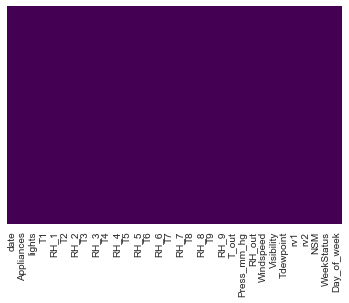

In [131]:
sns.heatmap(read_testingdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### The above Heat map is to check that whether there are any null values in the testing dataframe or not.

In [132]:
read_testingdata.isnull().any()

date           False
Appliances     False
lights         False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
NSM            False
WeekStatus     False
Day_of_week    False
dtype: bool

#### The above code is to check that whether there are any null values in the testing dataset or not.

In [133]:
X_test = read_testingdata[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2','NSM']]
print (X_test.shape)
y_test = read_testingdata['Appliances']
print (y_test.shape)

(4932, 28)
(4932,)


#### The above code is assigning the variables to X_test and y_test arrays

# Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

# `Training Data` 

In [134]:
read_trainingdata = pd.read_csv('training.csv' , index_col='date', parse_dates=True)
print(read_trainingdata.shape)
read_trainingdata.head()

(14803, 31)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,...,733.500,92.000,7.000,63.000,5.300,13.275,13.275,61200,Weekday,Monday
2016-01-11 17:10:00,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,...,733.600,92.000,6.667,59.167,5.200,18.606,18.606,61800,Weekday,Monday
2016-01-11 17:20:00,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,...,733.700,92.000,6.333,55.333,5.100,28.643,28.643,62400,Weekday,Monday
2016-01-11 17:40:00,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,...,733.900,92.000,5.667,47.667,4.900,10.084,10.084,63600,Weekday,Monday
2016-01-11 17:50:00,50,40,19.890,46.027,19.200,44.500,19.790,44.933,18.890,45.730,...,734.000,92.000,5.333,43.833,4.800,44.919,44.919,64200,Weekday,Monday


In [135]:
read_trainingdata.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus', 'Day_of_week'],
      dtype='object')

In [136]:
X_train = read_trainingdata[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2','NSM']]
print (X_train.shape)
y_train = read_trainingdata['Appliances']
print (y_train.shape)

(14803, 28)
(14803,)


In [137]:
from sklearn.linear_model import LinearRegression
 
lm = LinearRegression()

lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

#### The above code is predicting the values for y_test using X_test

In [138]:
df= pd.DataFrame({"Actual Appliances' values": y_test, "Predicted Appliances' values": predictions})
df.head()

,Actual Appliances' values,Predicted Appliances' values
0,50,159.463
1,60,173.740
2,230,211.456
3,580,196.957
4,100,189.807


#### The above code is showing the Actual Appliances' values and Predicted Appliances' values in a dataframe

## RMSE

In [139]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 93.56425120887656


#### The above code is printing the RMSE (Root Mean Square Error) between the values of y_test ( predicted by using all 27 variables of our testing dataframe ) and predictions

## Plotting 

Text(0, 0.5, 'Residuals')

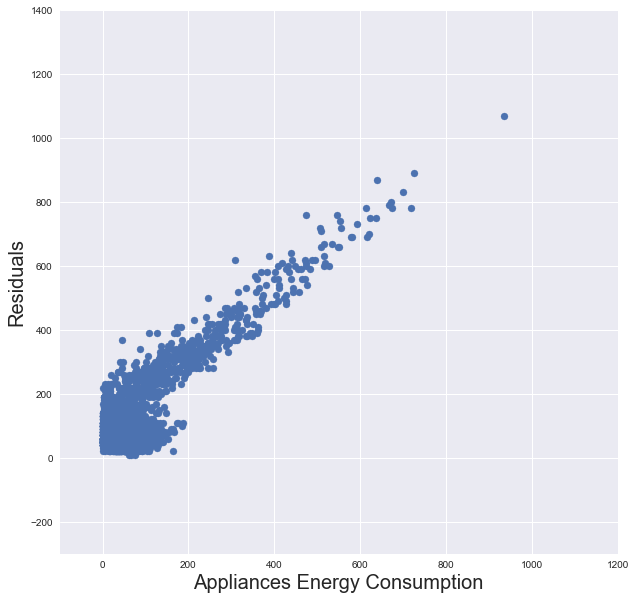

In [140]:
xxx =plt.subplots(figsize=(10,10))
ax=plt.scatter(abs(y_test-predictions),read_testingdata['Appliances'])
plt.xlim([-100,1200])
plt.xlabel("Appliances Energy Consumption", size = 20)
plt.ylim(-300,1400)
plt.ylabel("Residuals", size = 20)

#### The above code is plotting the scatter plot between Residuals and Appliances

# Line Graph of `RMSE vs Variables`

In [141]:
read_testingdata.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

#### The above code is checking the name of all the columns in testing data

In [142]:
read_testingdata.shape

(4932, 32)

#### The above code is checking the shape of testing data

## The most efficient variables of Testing Data for Appliances Variable are:- 

In [143]:
print(X_test.columns)
X_test.shape

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'NSM'],
      dtype='object')


(4932, 28)

# Now, i'll find the RMSE for every single variable in X_test dataframe 

In [144]:
var_rmse=[]

## For 'Apliances', applying Linear Reression, predicting values and finding RMSE

In [145]:
X_train = read_trainingdata[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['Appliances']
print (y_train.shape)

(14803, 25)
(14803,)


In [146]:
X_test = read_testingdata[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)
y_test = read_testingdata['Appliances']
print (y_test.shape)

(4932, 25)
(4932,)


In [147]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [148]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945]


## For 'lights', applying Linear Reression, predicting values and finding RMSE

In [149]:
X_train = read_trainingdata[['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['lights']
print (y_train.shape)



X_test = read_testingdata[['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['lights']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [150]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [151]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478]


## For 'T1', applying Linear Reression, predicting values and finding RMSE

In [152]:
X_train = read_trainingdata[['Appliances','lights', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['T1']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['T1']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [153]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [154]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396]


## For 'RH_1', applying Linear Reression, predicting values and finding RMSE

In [155]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['RH_1']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['RH_1']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [156]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [157]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731]


## For 'T2', applying Linear Reression, predicting values and finding RMSE

In [158]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['T2']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['T2']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [159]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [160]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115]


## For 'RH_2', applying Linear Reression, predicting values and finding RMSE

In [161]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['RH_2']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['RH_2']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [162]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [163]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106]


## For 'T3', applying Linear Reression, predicting values and finding RMSE

In [164]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['T3']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['T3']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [165]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [166]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173]


## For 'RH_3', applying Linear Reression, predicting values and finding RMSE

In [167]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['RH_3']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['RH_3']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [168]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [169]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956]


## For 'T4', applying Linear Reression, predicting values and finding RMSE

In [170]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [171]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956]


## For 'RH_4', applying Linear Reression, predicting values and finding RMSE

In [172]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['RH_4']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['RH_4']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [173]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['T4']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['T4']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [174]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [175]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508]


## For 'T5', applying Linear Reression, predicting values and finding RMSE

In [176]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['T5']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['T5']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [177]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [178]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498]


## For 'RH_5', applying Linear Reression, predicting values and finding RMSE

In [179]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['RH_5']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['RH_5']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [180]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [181]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667]


## For 'T6', applying Linear Reression, predicting values and finding RMSE

In [182]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['T6']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['T6']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [183]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [184]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422]


## For 'RH_6', applying Linear Reression, predicting values and finding RMSE

In [185]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['RH_6']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['RH_6']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [186]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [187]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422, 9.82597949386173]


## For 'T7', applying Linear Reression, predicting values and finding RMSE

In [188]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['T7']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['T7']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [189]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [190]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422, 9.82597949386173, 0.4945656300964366]


## For 'RH_7', applying Linear Reression, predicting values and finding RMSE

In [191]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['RH_7']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['RH_7']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [192]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [193]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422, 9.82597949386173, 0.4945656300964366, 1.5671763279068076]


## For 'T8', applying Linear Reression, predicting values and finding RMSE

In [194]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['T8']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['T8']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [195]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [196]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422, 9.82597949386173, 0.4945656300964366, 1.5671763279068076, 0.6713985935354236]


## For 'RH_8', applying Linear Reression, predicting values and finding RMSE

In [197]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['RH_8']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['RH_8']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [198]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [199]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422, 9.82597949386173, 0.4945656300964366, 1.5671763279068076, 0.6713985935354236, 1.7860882740278792]


## For 'T9', applying Linear Reression, predicting values and finding RMSE

In [200]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['T9']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['T9']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [201]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [202]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422, 9.82597949386173, 0.4945656300964366, 1.5671763279068076, 0.6713985935354236, 1.7860882740278792, 0.37693892413022406]


## For 'RH_9', applying Linear Reression, predicting values and finding RMSE

In [203]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['RH_9']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['RH_9']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [204]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [205]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422, 9.82597949386173, 0.4945656300964366, 1.5671763279068076, 0.6713985935354236, 1.7860882740278792, 0.37693892413022406, 1.6541929668646167]


## For 'T_out', applying Linear Reression, predicting values and finding RMSE

In [206]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['T_out']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['T_out']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [207]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [208]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422, 9.82597949386173, 0.4945656300964366, 1.5671763279068076, 0.6713985935354236, 1.7860882740278792, 0.37693892413022406, 1.6541929668646167, 0.433829079853164]


## For 'Press_mm_hg', applying Linear Reression, predicting values and finding RMSE

In [209]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['Press_mm_hg']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['Press_mm_hg']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [210]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [211]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422, 9.82597949386173, 0.4945656300964366, 1.5671763279068076, 0.6713985935354236, 1.7860882740278792, 0.37693892413022406, 1.6541929668646167, 0.433829079853164, 6.173660881191479]


## For 'RH_out', applying Linear Reression, predicting values and finding RMSE

In [212]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['RH_out']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['RH_out']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [213]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [214]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422, 9.82597949386173, 0.4945656300964366, 1.5671763279068076, 0.6713985935354236, 1.7860882740278792, 0.37693892413022406, 1.6541929668646167, 0.433829079853164, 6.173660881191479, 2.107747986818802]


## For 'Windspeed', applying Linear Reression, predicting values and finding RMSE

In [215]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Visibility', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['Windspeed']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Visibility', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['Windspeed']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [216]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [217]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422, 9.82597949386173, 0.4945656300964366, 1.5671763279068076, 0.6713985935354236, 1.7860882740278792, 0.37693892413022406, 1.6541929668646167, 0.433829079853164, 6.173660881191479, 2.107747986818802, 1.951754415603648]


## For 'Visibility', applying Linear Reression, predicting values and finding RMSE

In [218]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Tdewpoint']]
print (X_train.shape)

y_train = read_trainingdata['Visibility']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Tdewpoint']]
print (X_test.shape)

y_test = read_testingdata['Visibility']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [219]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [220]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422, 9.82597949386173, 0.4945656300964366, 1.5671763279068076, 0.6713985935354236, 1.7860882740278792, 0.37693892413022406, 1.6541929668646167, 0.433829079853164, 6.173660881191479, 2.107747986818802, 1.951754415603648, 11.51113699008296]


## For 'Tdewpoint', applying Linear Reression, predicting values and finding RMSE

In [221]:
X_train = read_trainingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility']]
print (X_train.shape)

y_train = read_trainingdata['Tdewpoint']
print (y_train.shape)



X_test = read_testingdata[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility']]
print (X_test.shape)

y_test = read_testingdata['Tdewpoint']
print (y_test.shape)

(14803, 25)
(14803,)
(4932, 25)
(4932,)


In [222]:
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [223]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
var_rmse.append(rmse)

print(var_rmse)
print(len(var_rmse))

[93.69971138183945, 6.935751139020478, 0.36281411083579396, 0.9825321625820731, 0.4096827284605115, 0.8609176572970106, 0.6259966161862173, 0.9934130349707956, 0.9934130349707956, 0.6418300146930508, 0.5694360398465498, 7.667678577853667, 1.0380247689247422, 9.82597949386173, 0.4945656300964366, 1.5671763279068076, 0.6713985935354236, 1.7860882740278792, 0.37693892413022406, 1.6541929668646167, 0.433829079853164, 6.173660881191479, 2.107747986818802, 1.951754415603648, 11.51113699008296, 0.44871625735652826]
26


#### The above code is printing the RMSE values of all the variables and the total number of variables  

# Plot between RMSE and Variables 

Text(0, 0.5, 'RMSE')

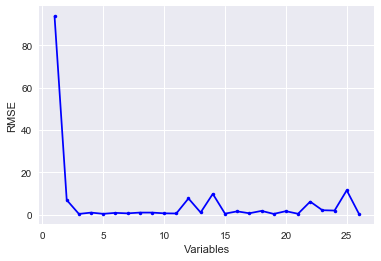

In [224]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,27), var_rmse, 'b.-',color='b')
plt.xlabel("Variables")
plt.ylabel("RMSE")

#### The above plot is showing the `line graph` between RMSE and number of Variables